## Import Project Dependencies

In [1]:
import sys
#sys.path.append("/home/dse/kaggle/py27xgboost/xgboost/python-package")
sys.path.append("/opt/conda/lib/python3.5/site-packages/ml_metrics-0.1.4-py3.5.egg")

In [2]:
# multiclass classification
from pandas import read_csv
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Imputer
from scipy.stats import skew
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import ml_metrics as metrics

/Users/arm/anaconda2/envs/py2k/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__)) # numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__)) # pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

scipy: 0.18.0
numpy: 1.11.1
matplotlib: 1.5.1
pandas: 0.18.1
sklearn: 0.18


## Load the Data Set

In [4]:
ames_train = pd.read_csv("../data/ames_train.csv")
ames_test = pd.read_csv("../data/ames_test.csv")
ames_train.head(15)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL         65.0     8450   Pave   NaN      Reg   
1    2          20       RL         80.0     9600   Pave   NaN      Reg   
2    3          60       RL         68.0    11250   Pave   NaN      IR1   
3    4          70       RL         60.0     9550   Pave   NaN      IR1   
4    5          60       RL         84.0    14260   Pave   NaN      IR1   
5    6          50       RL         85.0    14115   Pave   NaN      IR1   
6    7          20       RL         75.0    10084   Pave   NaN      Reg   
7    8          60       RL          NaN    10382   Pave   NaN      IR1   
8    9          50       RM         51.0     6120   Pave   NaN      Reg   
9   10         190       RL         50.0     7420   Pave   NaN      Reg   
10  11          20       RL         70.0    11200   Pave   NaN      Reg   
11  12          60       RL         85.0    11924   Pave   NaN      IR1   
12  13          20       RL          NaN    12968   Pave   NaN      IR2   
13  14          20       RL         91.0    10652   Pave   NaN      IR1   
14  15          20       RL          NaN    10920   Pave   NaN      IR1   

   LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature  \
0          Lvl    AllPub    ...            0    NaN    NaN         NaN   
1          Lvl    AllPub    ...            0    NaN    NaN         NaN   
2          Lvl    AllPub    ...            0    NaN    NaN         NaN   
3          Lvl    AllPub    ...            0    NaN    NaN         NaN   
4          Lvl    AllPub    ...            0    NaN    NaN         NaN   
5          Lvl    AllPub    ...            0    NaN  MnPrv        Shed   
6          Lvl    AllPub    ...            0    NaN    NaN         NaN   
7          Lvl    AllPub    ...            0    NaN    NaN        Shed   
8          Lvl    AllPub    ...            0    NaN    NaN         NaN   
9          Lvl    AllPub    ...            0    NaN    NaN         NaN   
10         Lvl    AllPub    ...            0    NaN    NaN         NaN   
11         Lvl    AllPub    ...            0    NaN    NaN         NaN   
12         Lvl    AllPub    ...            0    NaN    NaN         NaN   
13         Lvl    AllPub    ...            0    NaN    NaN         NaN   
14         Lvl    AllPub    ...            0    NaN   GdWo         NaN   

   MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0        0      2   2008        WD         Normal     208500  
1        0      5   2007        WD         Normal     181500  
2        0      9   2008        WD         Normal     223500  
3        0      2   2006        WD        Abnorml     140000  
4        0     12   2008        WD         Normal     250000  
5      700     10   2009        WD         Normal     143000  
6        0      8   2007        WD         Normal     307000  
7      350     11   2009        WD         Normal     200000  
8        0      4   2008        WD        Abnorml     129900  
9        0      1   2008        WD         Normal     118000  
10       0      2   2008        WD         Normal     129500  
11       0      7   2006       New        Partial     345000  
12       0      9   2008        WD         Normal     144000  
13       0      8   2007       New        Partial     279500  
14       0      5   2008        WD         Normal     157000  

[15 rows x 81 columns]

## Exploratory Data Analysis

### Descriptive Statistics

In [5]:
ames_train.shape

(1459, 81)

In [6]:
# data types for each attribute
ames_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [7]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
description = ames_train.describe()
print(description)

             Id  MSSubClass  LotFrontage     LotArea  OverallQual  OverallCond  YearBuilt  \
count  1459.000    1459.000     1200.000    1459.000     1459.000     1459.000   1459.000   
mean    730.000      56.923       70.046   10517.225        6.100        5.575   1971.272   
std     421.321      42.304       24.294    9984.676        1.383        1.113     30.213   
min       1.000      20.000       21.000    1300.000        1.000        1.000   1872.000   
25%     365.500      20.000          NaN    7549.000        5.000        5.000   1954.000   
50%     730.000      50.000          NaN    9477.000        6.000        5.000   1973.000   
75%    1094.500      70.000          NaN   11603.000        7.000        6.000   2000.000   
max    1459.000     190.000      313.000  215245.000       10.000        9.000   2010.000   

       YearRemodAdd  MasVnrArea  BsmtFinSF1     ...      WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count      1459.000    1451.000    1459.000     ...        1459

/Users/arm/anaconda2/envs/py2k/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [8]:
description = ames_test.describe()
print(description)

             Id  MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  YearBuilt  \
count  1459.000    1459.000     1232.000   1459.000     1459.000     1459.000   1459.000   
mean   2190.000      57.378       68.580   9819.161        6.079        5.554   1971.358   
std     421.321      42.747       22.377   4955.517        1.437        1.114     30.390   
min    1461.000      20.000       21.000   1470.000        1.000        1.000   1879.000   
25%    1825.500      20.000          NaN   7391.000        5.000        5.000   1953.000   
50%    2190.000      50.000          NaN   9399.000        6.000        5.000   1973.000   
75%    2554.500      70.000          NaN  11517.500        7.000        6.000   2001.000   
max    2919.000     190.000      200.000  56600.000       10.000        9.000   2010.000   

       YearRemodAdd  MasVnrArea  BsmtFinSF1    ...     GarageArea  WoodDeckSF  OpenPorchSF  \
count      1459.000    1444.000    1458.000    ...       1458.000    1459.000

## Correlations Between Attributes

In [9]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlations = ames_train.corr(method='pearson')
print(correlations)

                      Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
Id             1.000e+00       0.012       -0.011   -0.033       -0.027        0.012     -0.012   
MSSubClass     1.221e-02       1.000       -0.386   -0.140        0.032       -0.059      0.028   
LotFrontage   -1.091e-02      -0.386        1.000    0.426        0.252       -0.059      0.123   
LotArea       -3.319e-02      -0.140        0.426    1.000        0.106       -0.006      0.014   
OverallQual   -2.746e-02       0.032        0.252    0.106        1.000       -0.092      0.572   
OverallCond    1.217e-02      -0.059       -0.059   -0.006       -0.092        1.000     -0.376   
YearBuilt     -1.248e-02       0.028        0.123    0.014        0.572       -0.376      1.000   
YearRemodAdd  -2.088e-02       0.040        0.089    0.014        0.550        0.074      0.593   
MasVnrArea    -4.967e-02       0.023        0.194    0.104        0.412       -0.128      0.316   
BsmtFinSF1

In [10]:
corr = ames_train.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)
sns.plt

<module 'matplotlib.pyplot' from '/Users/arm/anaconda2/envs/py2k/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [11]:
cor_dict = corr['SalePrice'].to_dict()
del cor_dict['SalePrice']
print("List the numerical features decendingly by their correlation with Sale Price:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

List the numerical features decendingly by their correlation with Sale Price:

OverallQual: 	0.790971646739
GrLivArea: 	0.708584256389
GarageCars: 	0.640383308726
GarageArea: 	0.623384913038
TotalBsmtSF: 	0.613791532285
1stFlrSF: 	0.605970779941
FullBath: 	0.560604113108
TotRmsAbvGrd: 	0.533682199367
YearBuilt: 	0.522876912022
YearRemodAdd: 	0.507015099034
GarageYrBlt: 	0.486264369585
MasVnrArea: 	0.477410802037
Fireplaces: 	0.466827565809
BsmtFinSF1: 	0.386782893996
LotFrontage: 	0.351896380432
WoodDeckSF: 	0.32888080889
2ndFlrSF: 	0.319192983491
OpenPorchSF: 	0.315979580344
HalfBath: 	0.284626062633
LotArea: 	0.263842911565
BsmtFullBath: 	0.227551303799
BsmtUnfSF: 	0.214280506904
BedroomAbvGr: 	0.168272155796
KitchenAbvGr: 	-0.135978700432
EnclosedPorch: 	-0.128695108854
ScreenPorch: 	0.111378177949
PoolArea: 	0.0923894928294
MSSubClass: 	-0.0845630196621
OverallCond: 	-0.0777543847898
MoSold: 	0.046400930621
3SsnPorch: 	0.04455301874
YrSold: 	-0.0288844993565
LowQualFinSF: 	-0.02564

The housing price correlates strongly with OverallQual, GrLivArea(GarageCars), GargeArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd, GargeYrBlt, MasVnrArea and Fireplaces. But some of those features are highly correlated among each others.

In [12]:
sns.regplot(x = 'OverallQual', y = 'SalePrice', data = ames_train, color = 'Orange')

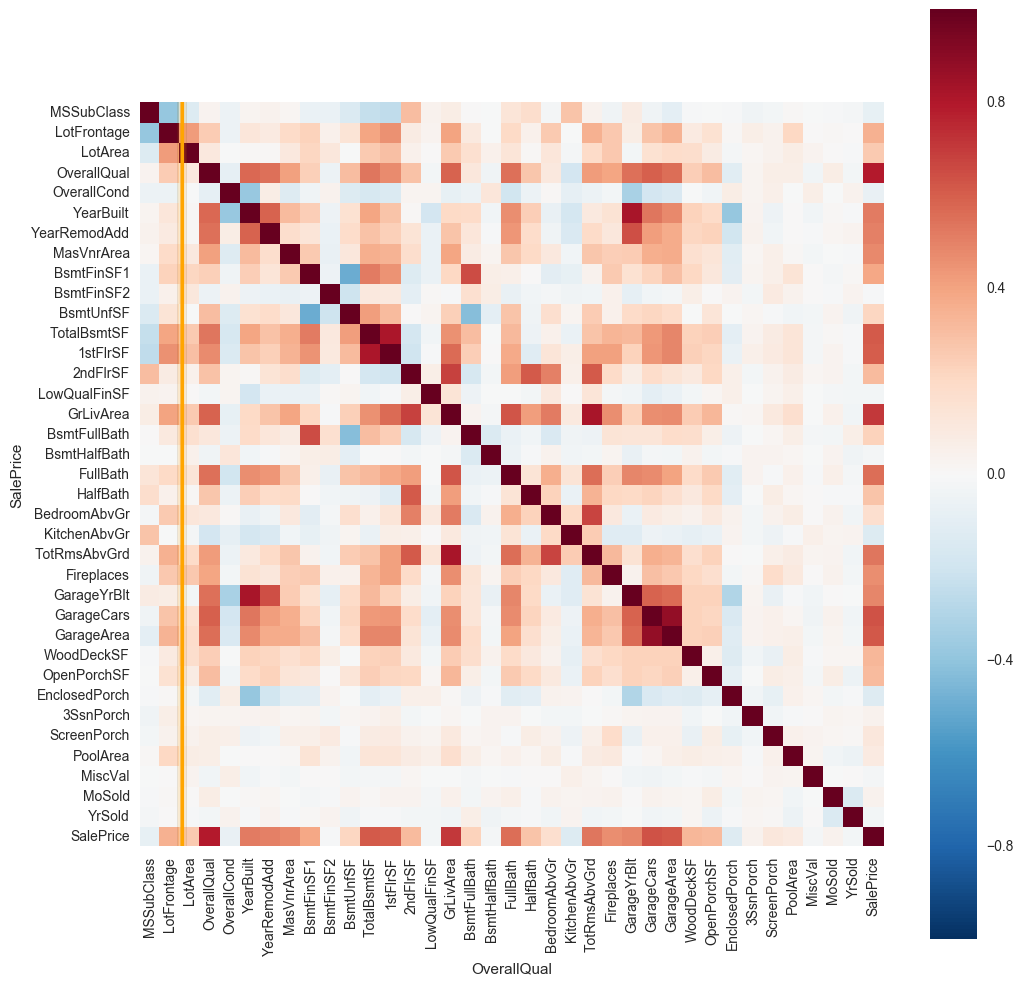

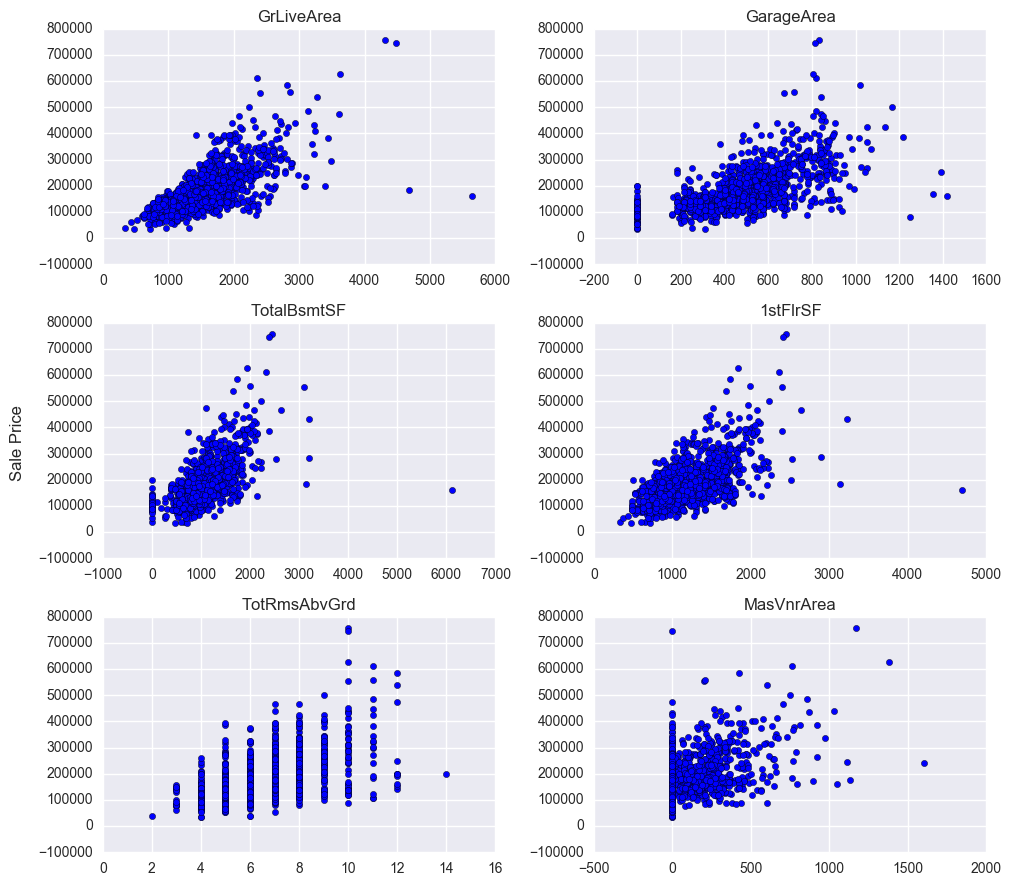

In [13]:
plt.figure(1)
f, axarr = plt.subplots(3, 2, figsize=(10, 9))
price = ames_train.SalePrice.values
axarr[0, 0].scatter(ames_train.GrLivArea.values, price)
axarr[0, 0].set_title('GrLiveArea')
axarr[0, 1].scatter(ames_train.GarageArea.values, price)
axarr[0, 1].set_title('GarageArea')
axarr[1, 0].scatter(ames_train.TotalBsmtSF.values, price)
axarr[1, 0].set_title('TotalBsmtSF')
axarr[1, 1].scatter(ames_train['1stFlrSF'].values, price)
axarr[1, 1].set_title('1stFlrSF')
axarr[2, 0].scatter(ames_train.TotRmsAbvGrd.values, price)
axarr[2, 0].set_title('TotRmsAbvGrd')
axarr[2, 1].scatter(ames_train.MasVnrArea.values, price)
axarr[2, 1].set_title('MasVnrArea')
f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

In [14]:
fig = plt.figure(2, figsize=(9, 7))
plt.subplot(211)
plt.scatter(ames_train.YearBuilt.values, price)
plt.title('YearBuilt')

plt.subplot(212)
plt.scatter(ames_train.YearRemodAdd.values, price)
plt.title('YearRemodAdd')

fig.text(-0.01, 0.5, 'Sale Price', va = 'center', rotation = 'vertical', fontsize = 12)

plt.tight_layout()

In [15]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = ames_train)
xt = plt.xticks(rotation=45)

In [16]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Neighborhood', data = ames_train)
xt = plt.xticks(rotation=45)

## Housing Price vs Sales

#### Sale Type & Condition

#### Sales Seasonality

In [17]:
fig, ax = plt.subplots(2, 1, figsize = (10, 6))
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = ames_train, ax = ax[0])
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = ames_train, ax = ax[1])
plt.tight_layout()

In [18]:
fig, ax = plt.subplots(2, 1, figsize = (10, 8))
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = ames_train, ax = ax[0])
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = ames_train, ax = ax[1])

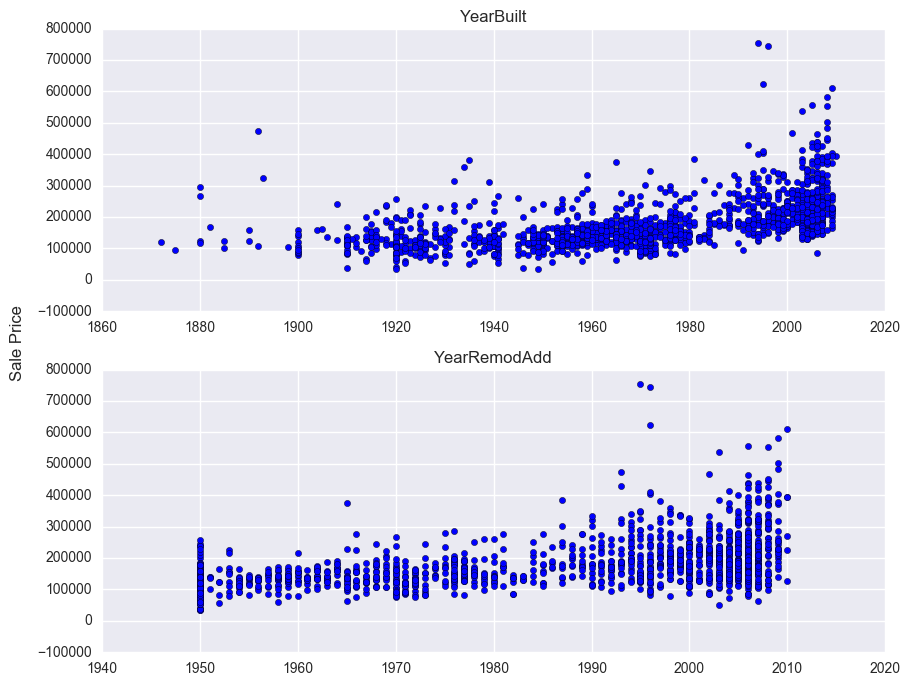

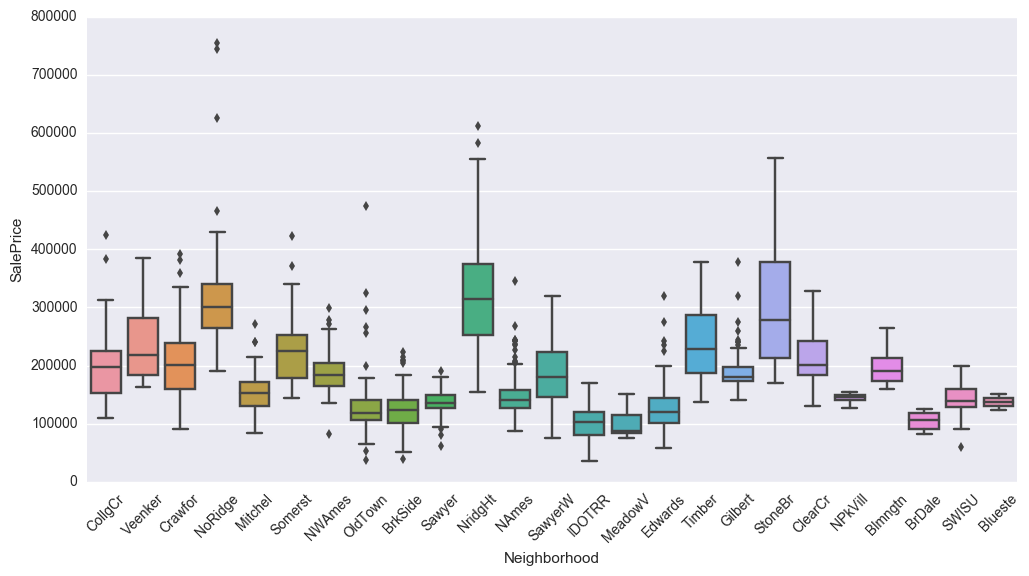

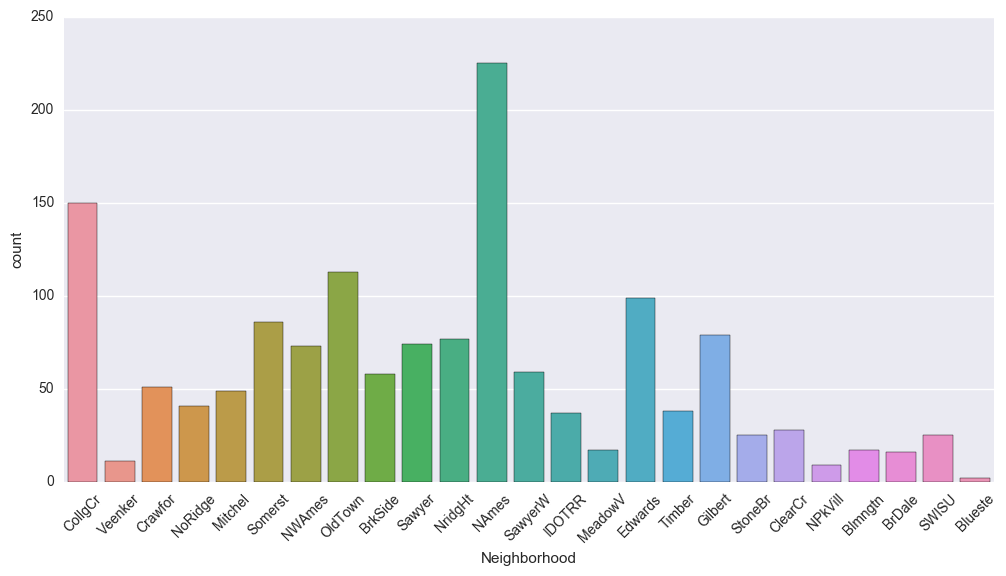

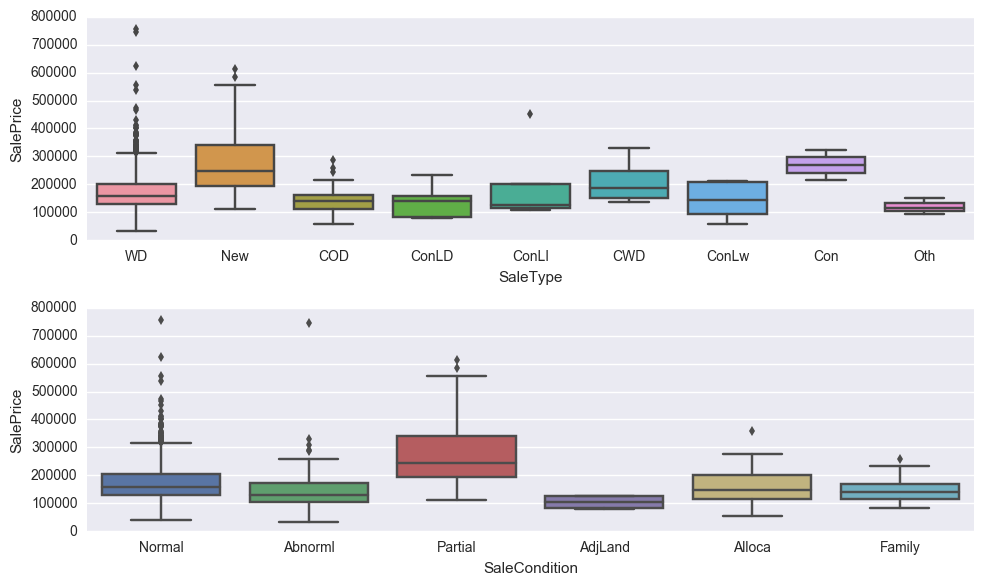

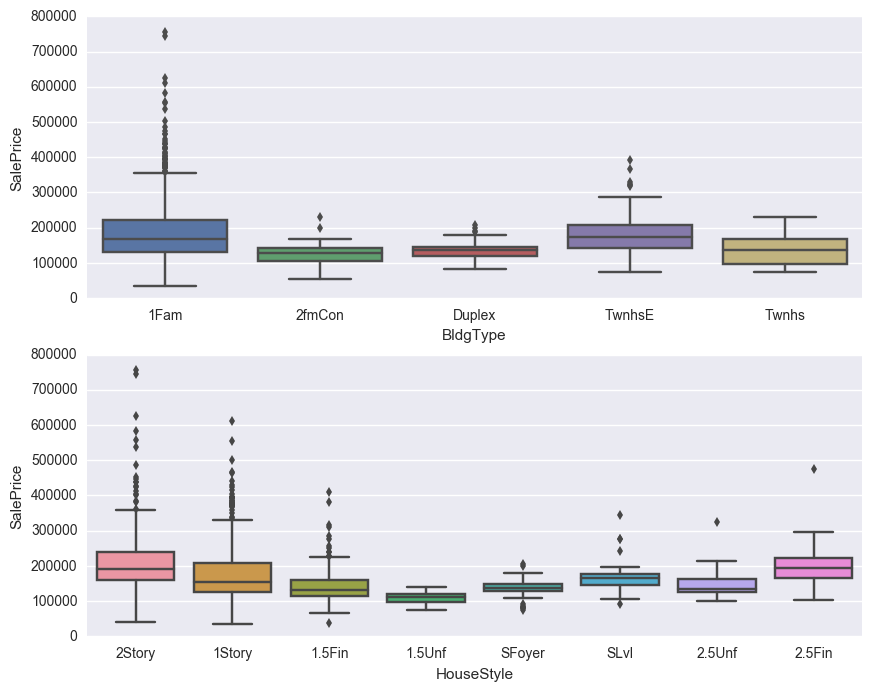

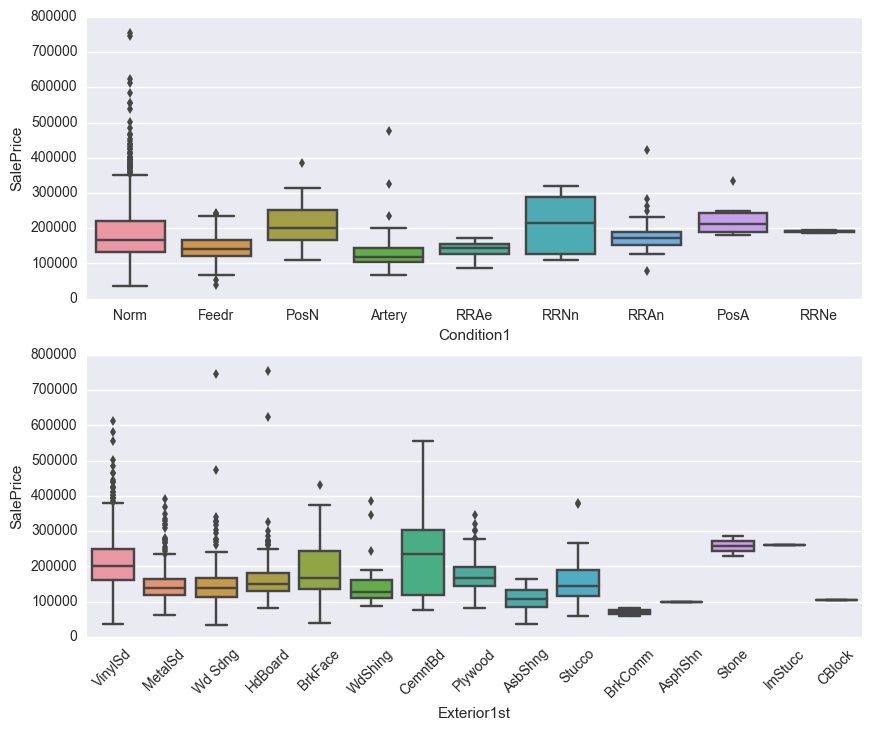

In [19]:
fig, ax = plt.subplots(2, 1, figsize = (10, 8))
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = ames_train, ax = ax[0])
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = ames_train, ax = ax[1])
x = plt.xticks(rotation = 45)
plt.show()

In [20]:
fig, ax = plt.subplots(2, 2, figsize = (10, 8))
sns.boxplot('BsmtCond', 'SalePrice', data = ames_train, ax = ax[0, 0])
sns.boxplot('BsmtQual', 'SalePrice', data = ames_train, ax = ax[0, 1])
sns.boxplot('BsmtExposure', 'SalePrice', data = ames_train, ax = ax[1, 0])
sns.boxplot('BsmtFinType1', 'SalePrice', data = ames_train, ax = ax[1, 1])

In [21]:
pd.crosstab(ames_train.HeatingQC, ames_train.CentralAir)

CentralAir   N    Y
HeatingQC          
Ex           8  733
Fa          24   25
Gd          13  227
Po           1    0
TA          49  379

In [22]:
pd.crosstab(ames_train.HeatingQC, ames_train.FireplaceQu)

FireplaceQu  Ex  Fa   Gd  Po   TA
HeatingQC                        
Ex           22  14  254   4  160
Fa            0   1   13   1    5
Gd            2   3   45   5   57
TA            0  15   68  10   91

In [23]:
sns.factorplot('HeatingQC', 'SalePrice', hue = 'CentralAir', estimator = np.mean, data = ames_train, 
             size = 4.5, aspect = 1.4)

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
sns.boxplot('Electrical', 'SalePrice', data = ames_train, ax = ax[0]).set(ylim = (0, 400000))
sns.countplot('Electrical', data = ames_train)
plt.tight_layout()

In [25]:
sns.factorplot('KitchenQual', 'SalePrice', estimator = np.mean, 
               size = 4.5, aspect = 1.4, data = ames_train, order = ['Ex', 'Gd', 'TA', 'Fa'])

In [26]:
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = ames_train)

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
sns.boxplot(x = 'Street', y = 'SalePrice', data = ames_train, ax = ax[0])
sns.boxplot(x = 'Alley', y = 'SalePrice', data = ames_train, ax = ax[1])
plt.tight_layout()

In [28]:
correlations = ames_test.corr(method='pearson')
print(correlations)

                      Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
Id             1.000e+00       0.005        0.010    0.051       -0.065        0.010     -0.059   
MSSubClass     4.993e-03       1.000       -0.451   -0.360        0.035       -0.072      0.041   
LotFrontage    9.930e-03      -0.451        1.000    0.645        0.183       -0.092      0.122   
LotArea        5.149e-02      -0.360        0.645    1.000        0.108       -0.103      0.048   
OverallQual   -6.489e-02       0.035        0.183    0.108        1.000       -0.096      0.622   
OverallCond    9.553e-03      -0.072       -0.092   -0.103       -0.096        1.000     -0.361   
YearBuilt     -5.865e-02       0.041        0.122    0.048        0.622       -0.361      1.000   
YearRemodAdd  -7.944e-02       0.046        0.093    0.037        0.591        0.022      0.632   
MasVnrArea    -2.142e-02      -0.012        0.252    0.189        0.454       -0.144      0.312   
BsmtFinSF1

## Skew of Univariate Distributions

In [29]:
# positive (right), zero show less skew and negative (left) skew
skew = ames_train.skew()
print(skew)

Id                0.000
MSSubClass        1.407
LotFrontage       2.163
LotArea          12.203
OverallQual       0.216
OverallCond       0.694
YearBuilt        -0.614
YearRemodAdd     -0.505
MasVnrArea        2.668
BsmtFinSF1        1.687
BsmtFinSF2        4.265
BsmtUnfSF         0.919
TotalBsmtSF       1.525
1stFlrSF          1.377
2ndFlrSF          0.812
LowQualFinSF      9.008
GrLivArea         1.366
BsmtFullBath      0.598
BsmtHalfBath      4.102
FullBath          0.035
HalfBath          0.678
BedroomAbvGr      0.212
KitchenAbvGr      4.487
TotRmsAbvGrd      0.676
Fireplaces        0.649
GarageYrBlt      -0.650
GarageCars       -0.344
GarageArea        0.179
WoodDeckSF        1.499
OpenPorchSF       2.364
EnclosedPorch     3.089
3SsnPorch        10.301
ScreenPorch       4.121
PoolArea         14.823
MiscVal          24.468
MoSold            0.212
YrSold            0.097
SalePrice         1.882
dtype: float64


In [30]:
skew = ames_test.skew()
print(skew)

Id                0.000
MSSubClass        1.347
LotFrontage       0.662
LotArea           3.115
OverallQual       0.181
OverallCond       0.449
YearBuilt        -0.588
YearRemodAdd     -0.400
MasVnrArea        2.533
BsmtFinSF1        1.166
BsmtFinSF2        4.041
BsmtUnfSF         0.920
TotalBsmtSF       0.814
1stFlrSF          1.558
2ndFlrSF          0.913
LowQualFinSF     16.167
GrLivArea         1.130
BsmtFullBath      0.650
BsmtHalfBath      3.780
FullBath          0.296
HalfBath          0.715
BedroomAbvGr      0.437
KitchenAbvGr      4.079
TotRmsAbvGrd      0.843
Fireplaces        0.820
GarageYrBlt      -0.158
GarageCars       -0.107
GarageArea        0.300
WoodDeckSF        2.131
OpenPorchSF       2.688
EnclosedPorch     4.669
3SsnPorch        12.524
ScreenPorch       3.788
PoolArea         20.197
MiscVal          20.075
MoSold            0.183
YrSold            0.169
dtype: float64


### Data Visualizations

## Univariate Plots

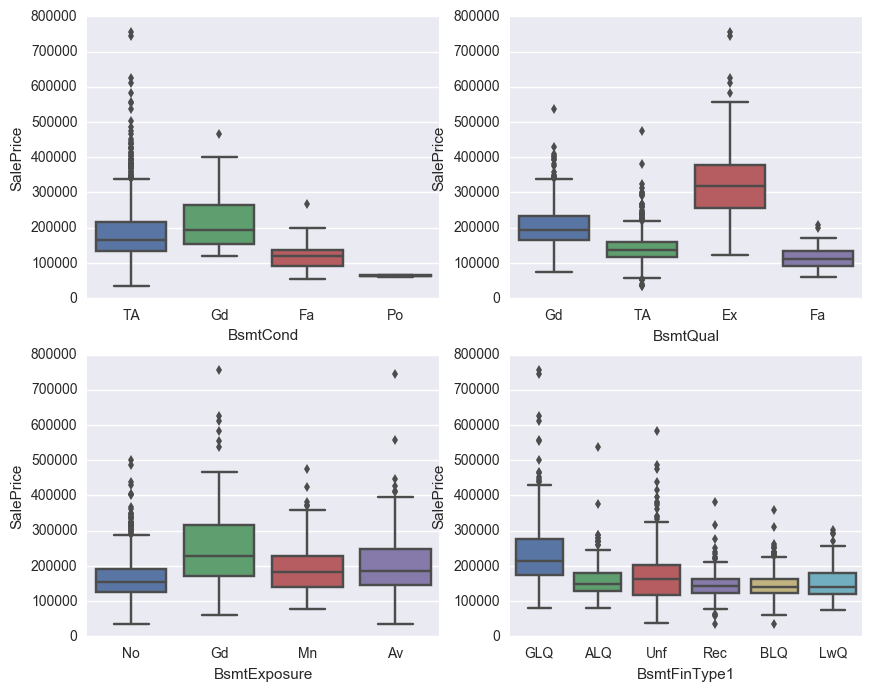

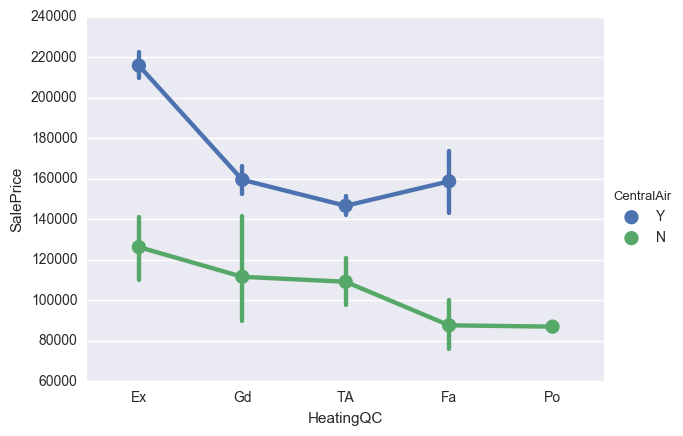

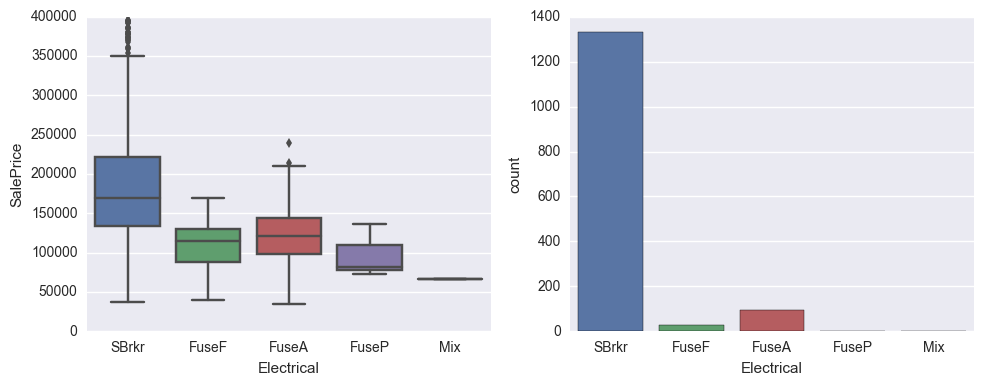

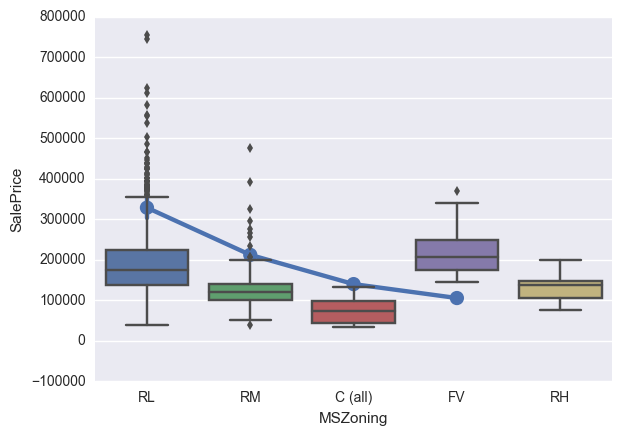

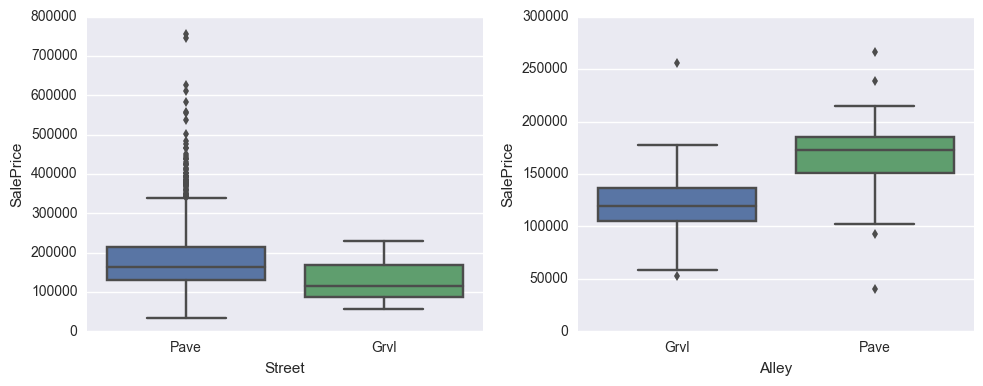

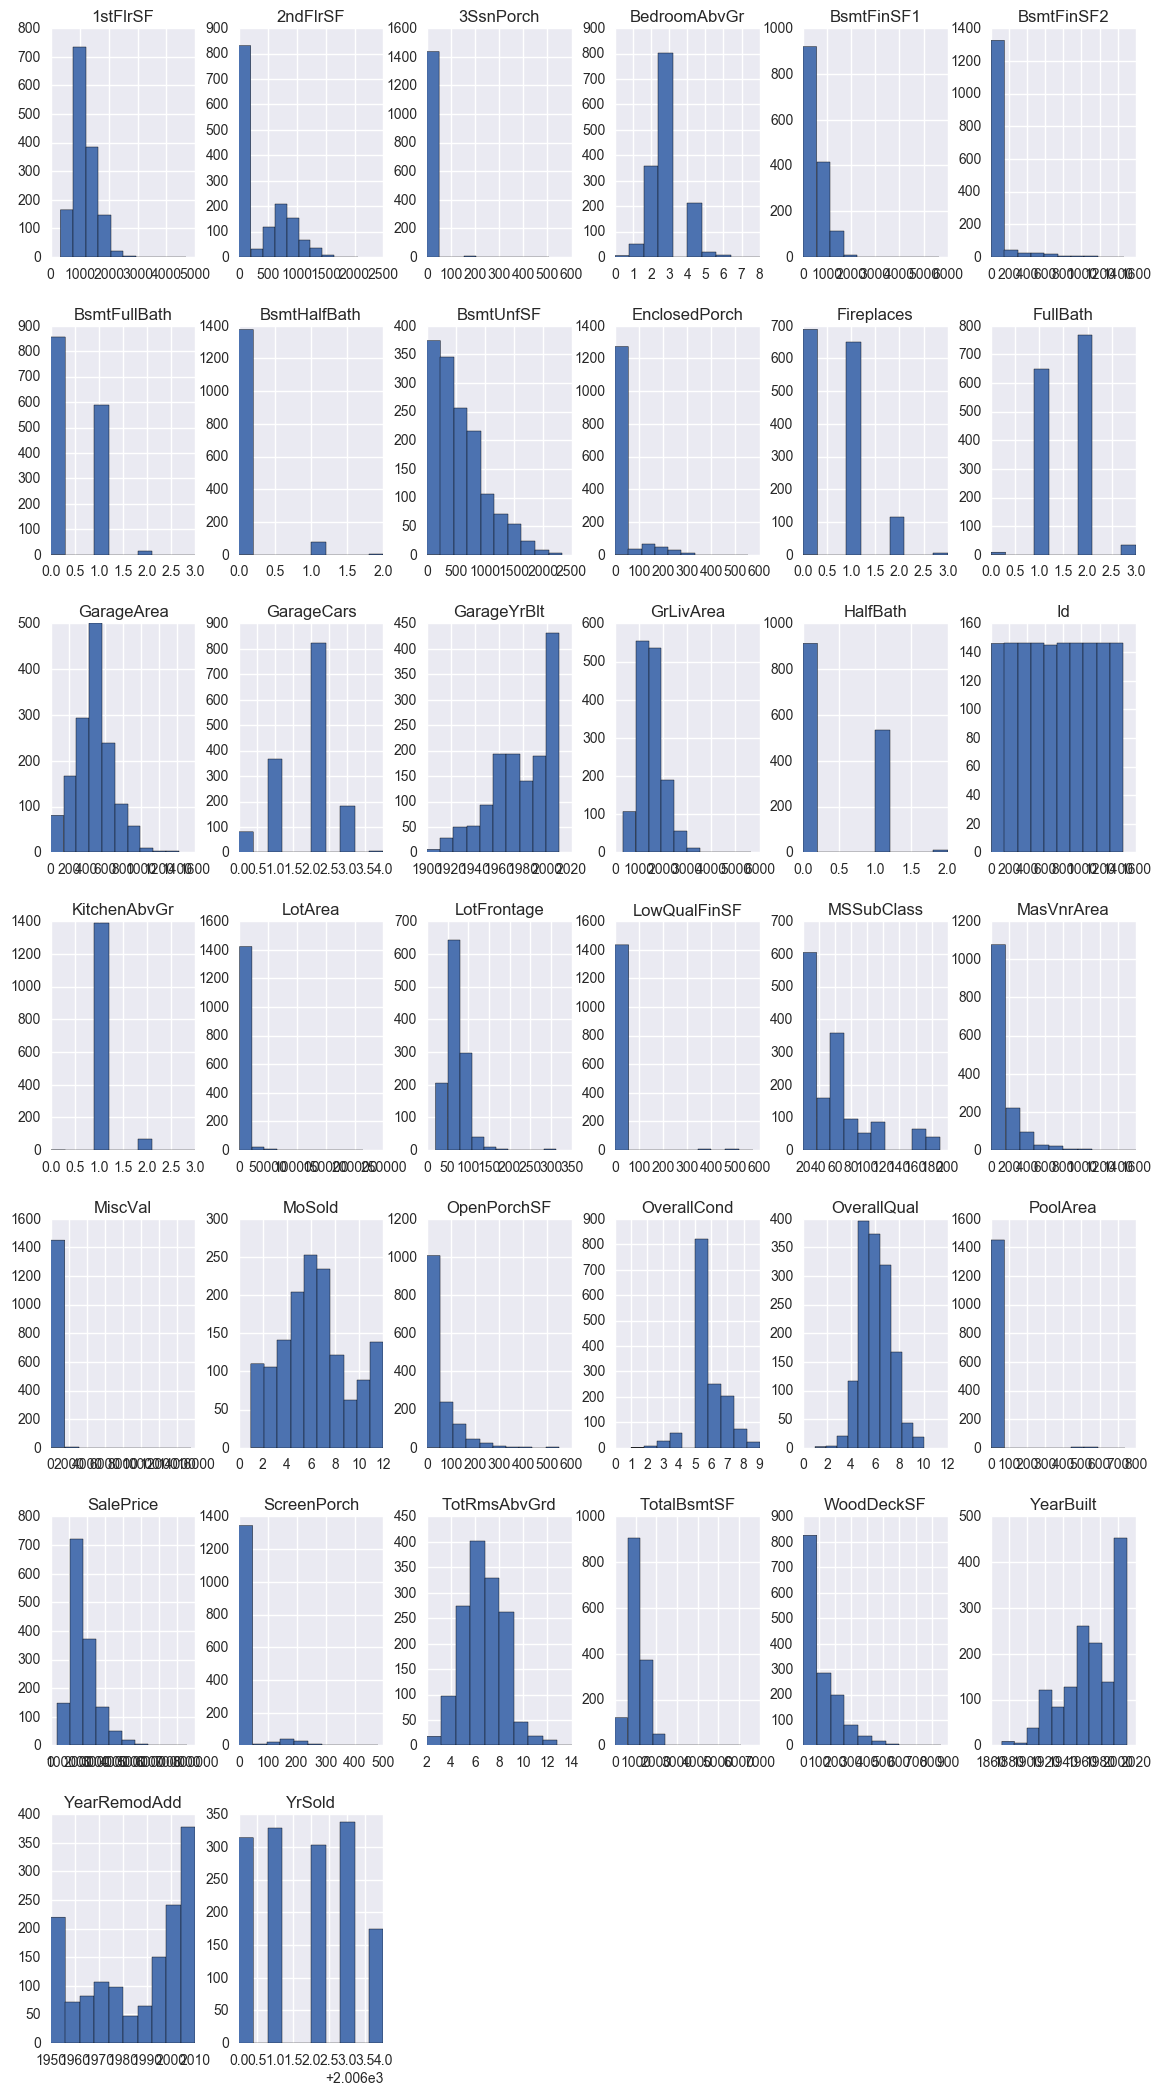

In [31]:
# training set
ames_train.hist(figsize=(14, 26))
plt.show() 

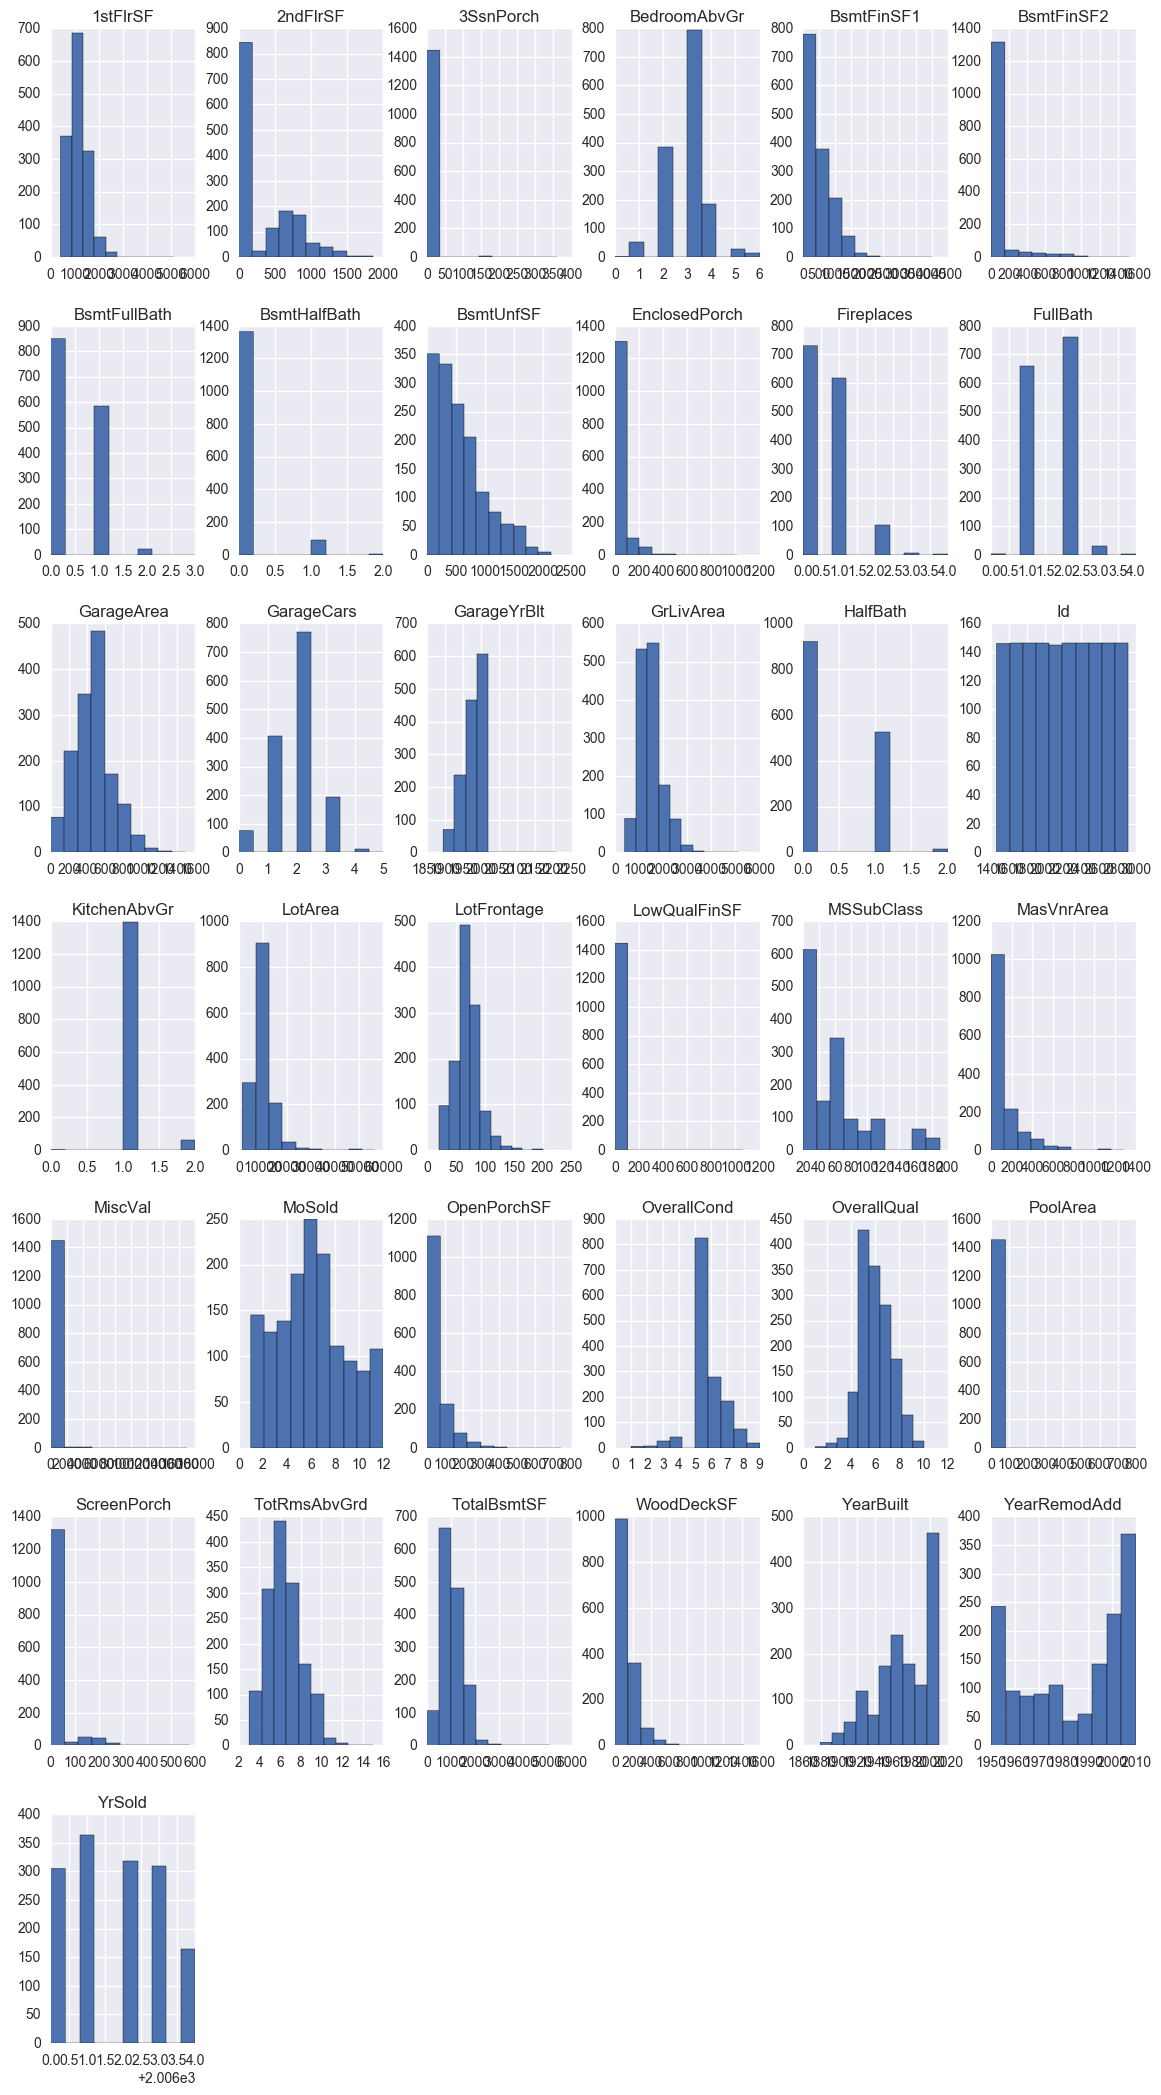

In [32]:
# hold out set
ames_test.hist(figsize=(14, 26))
plt.show() 

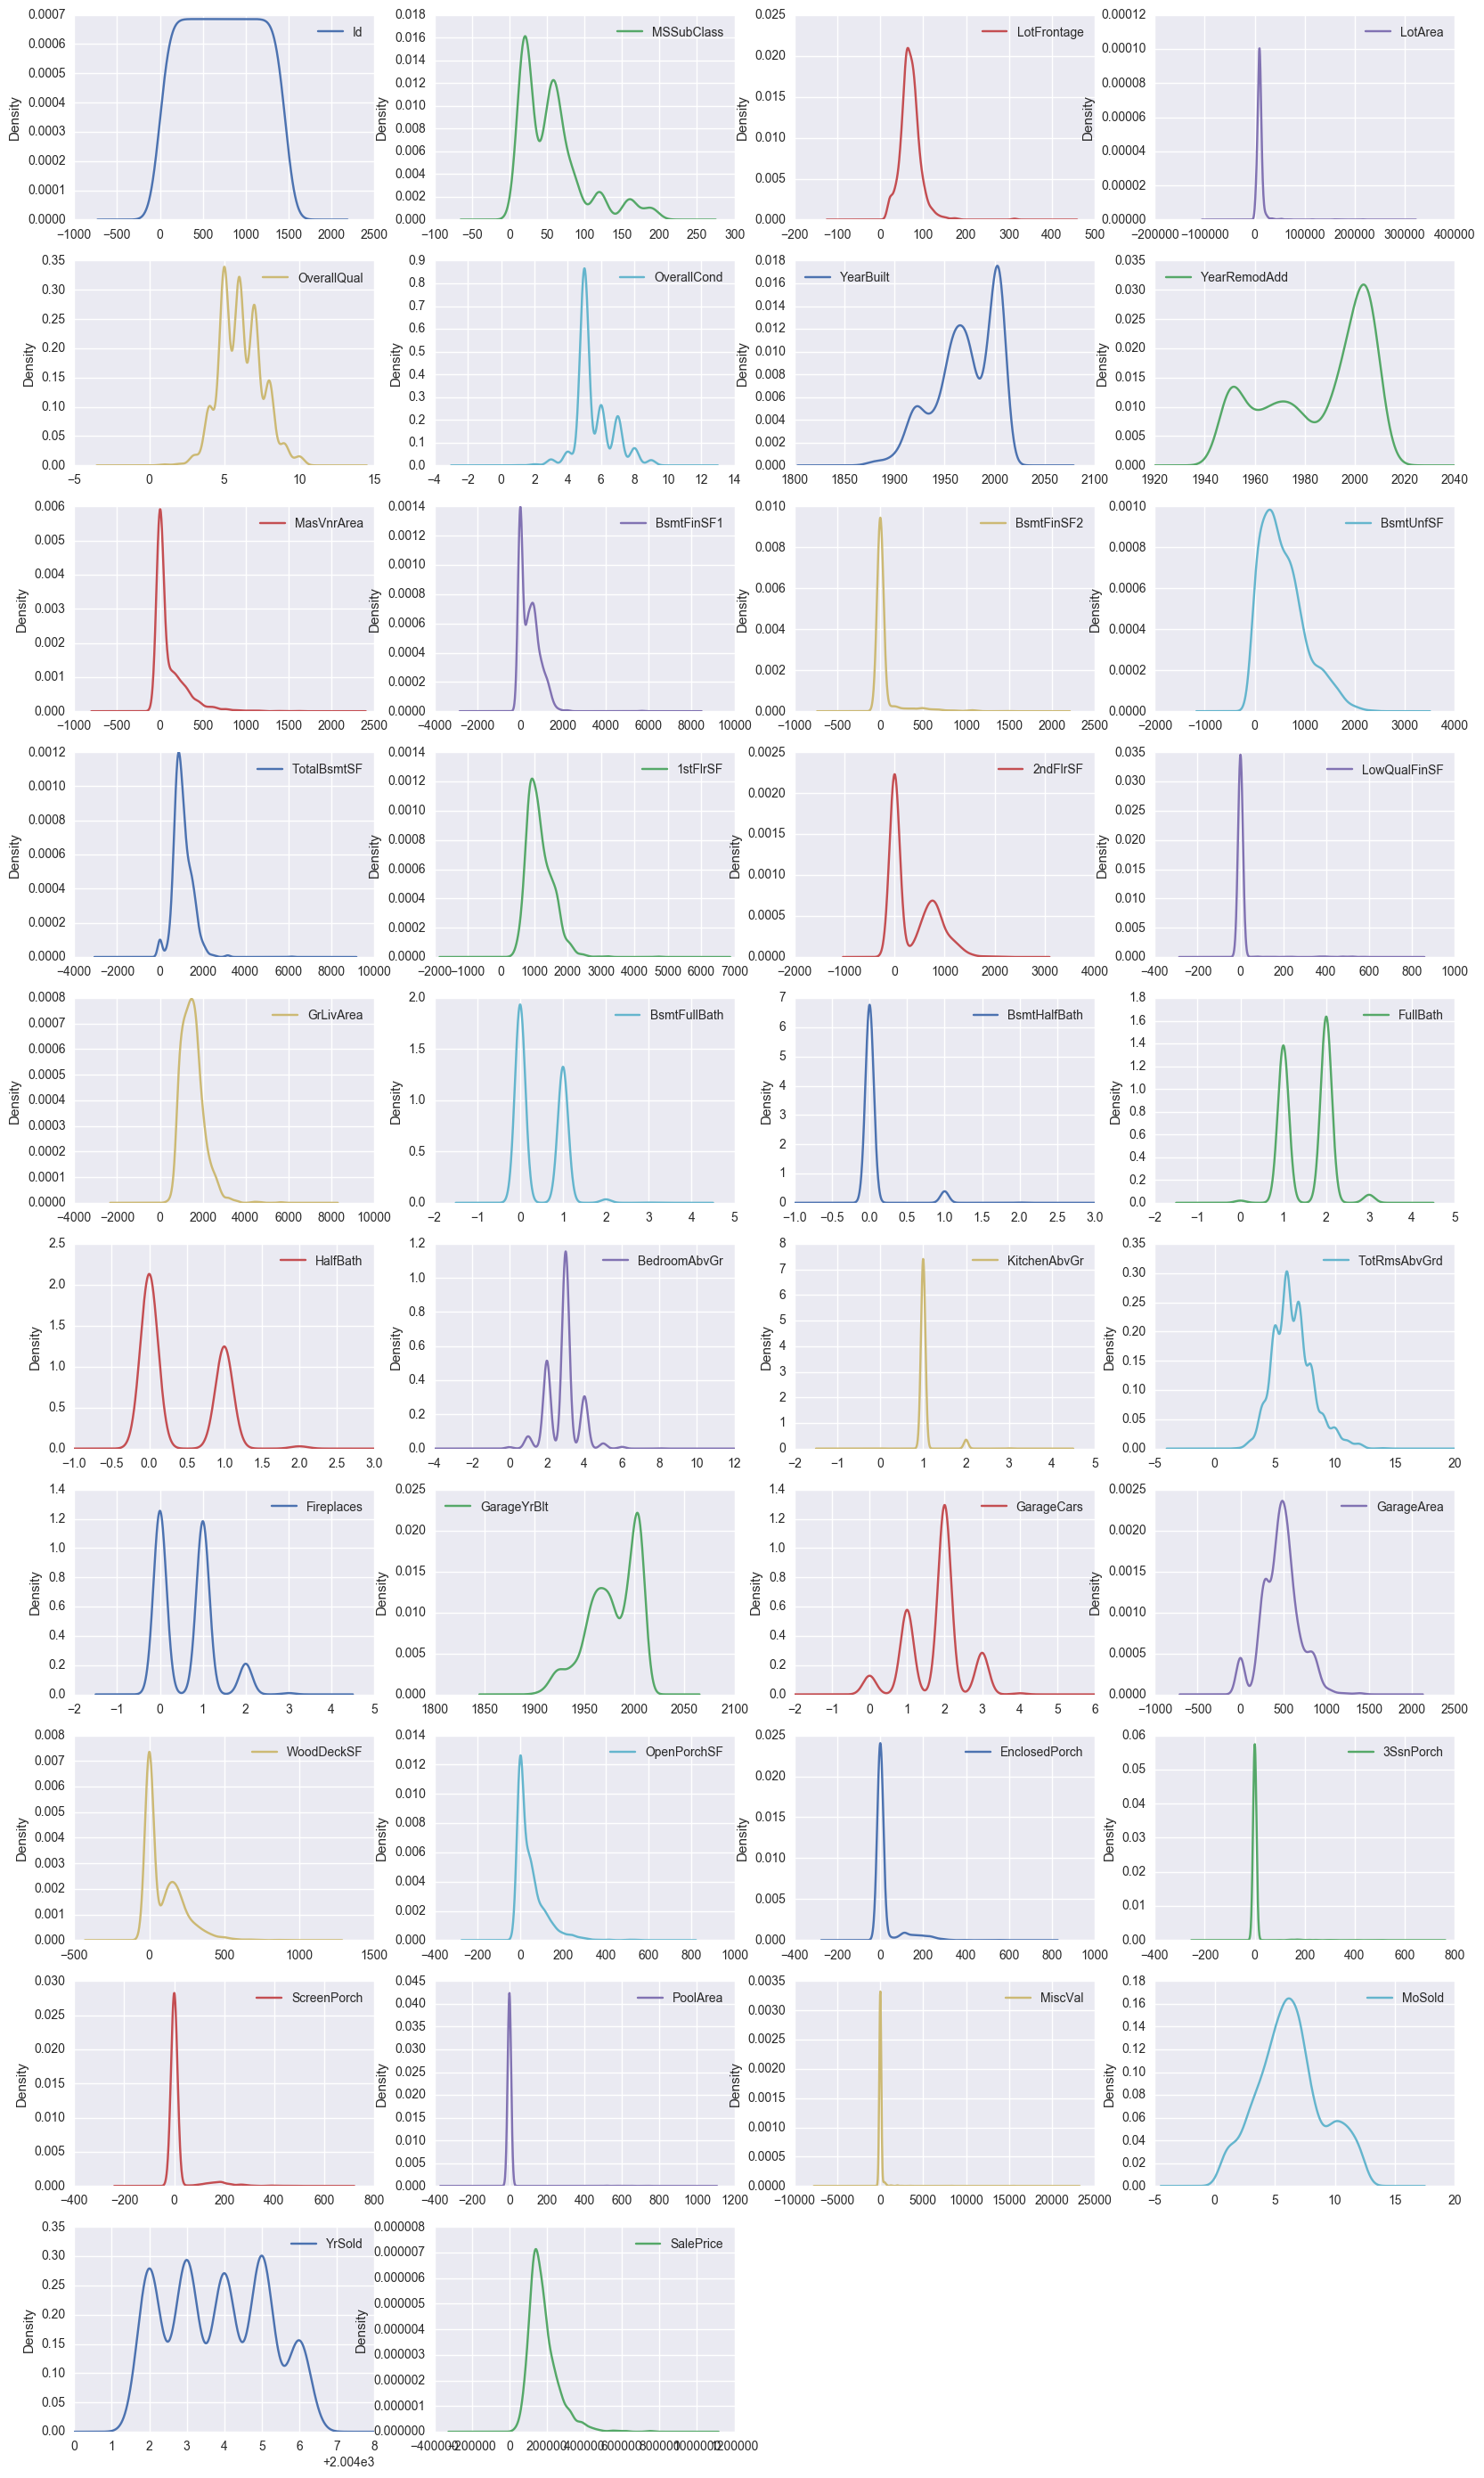

In [33]:
ames_train.plot(kind='density', figsize=(20, 35), layout=(10,4), subplots=True, sharex=False) 
plt.show()

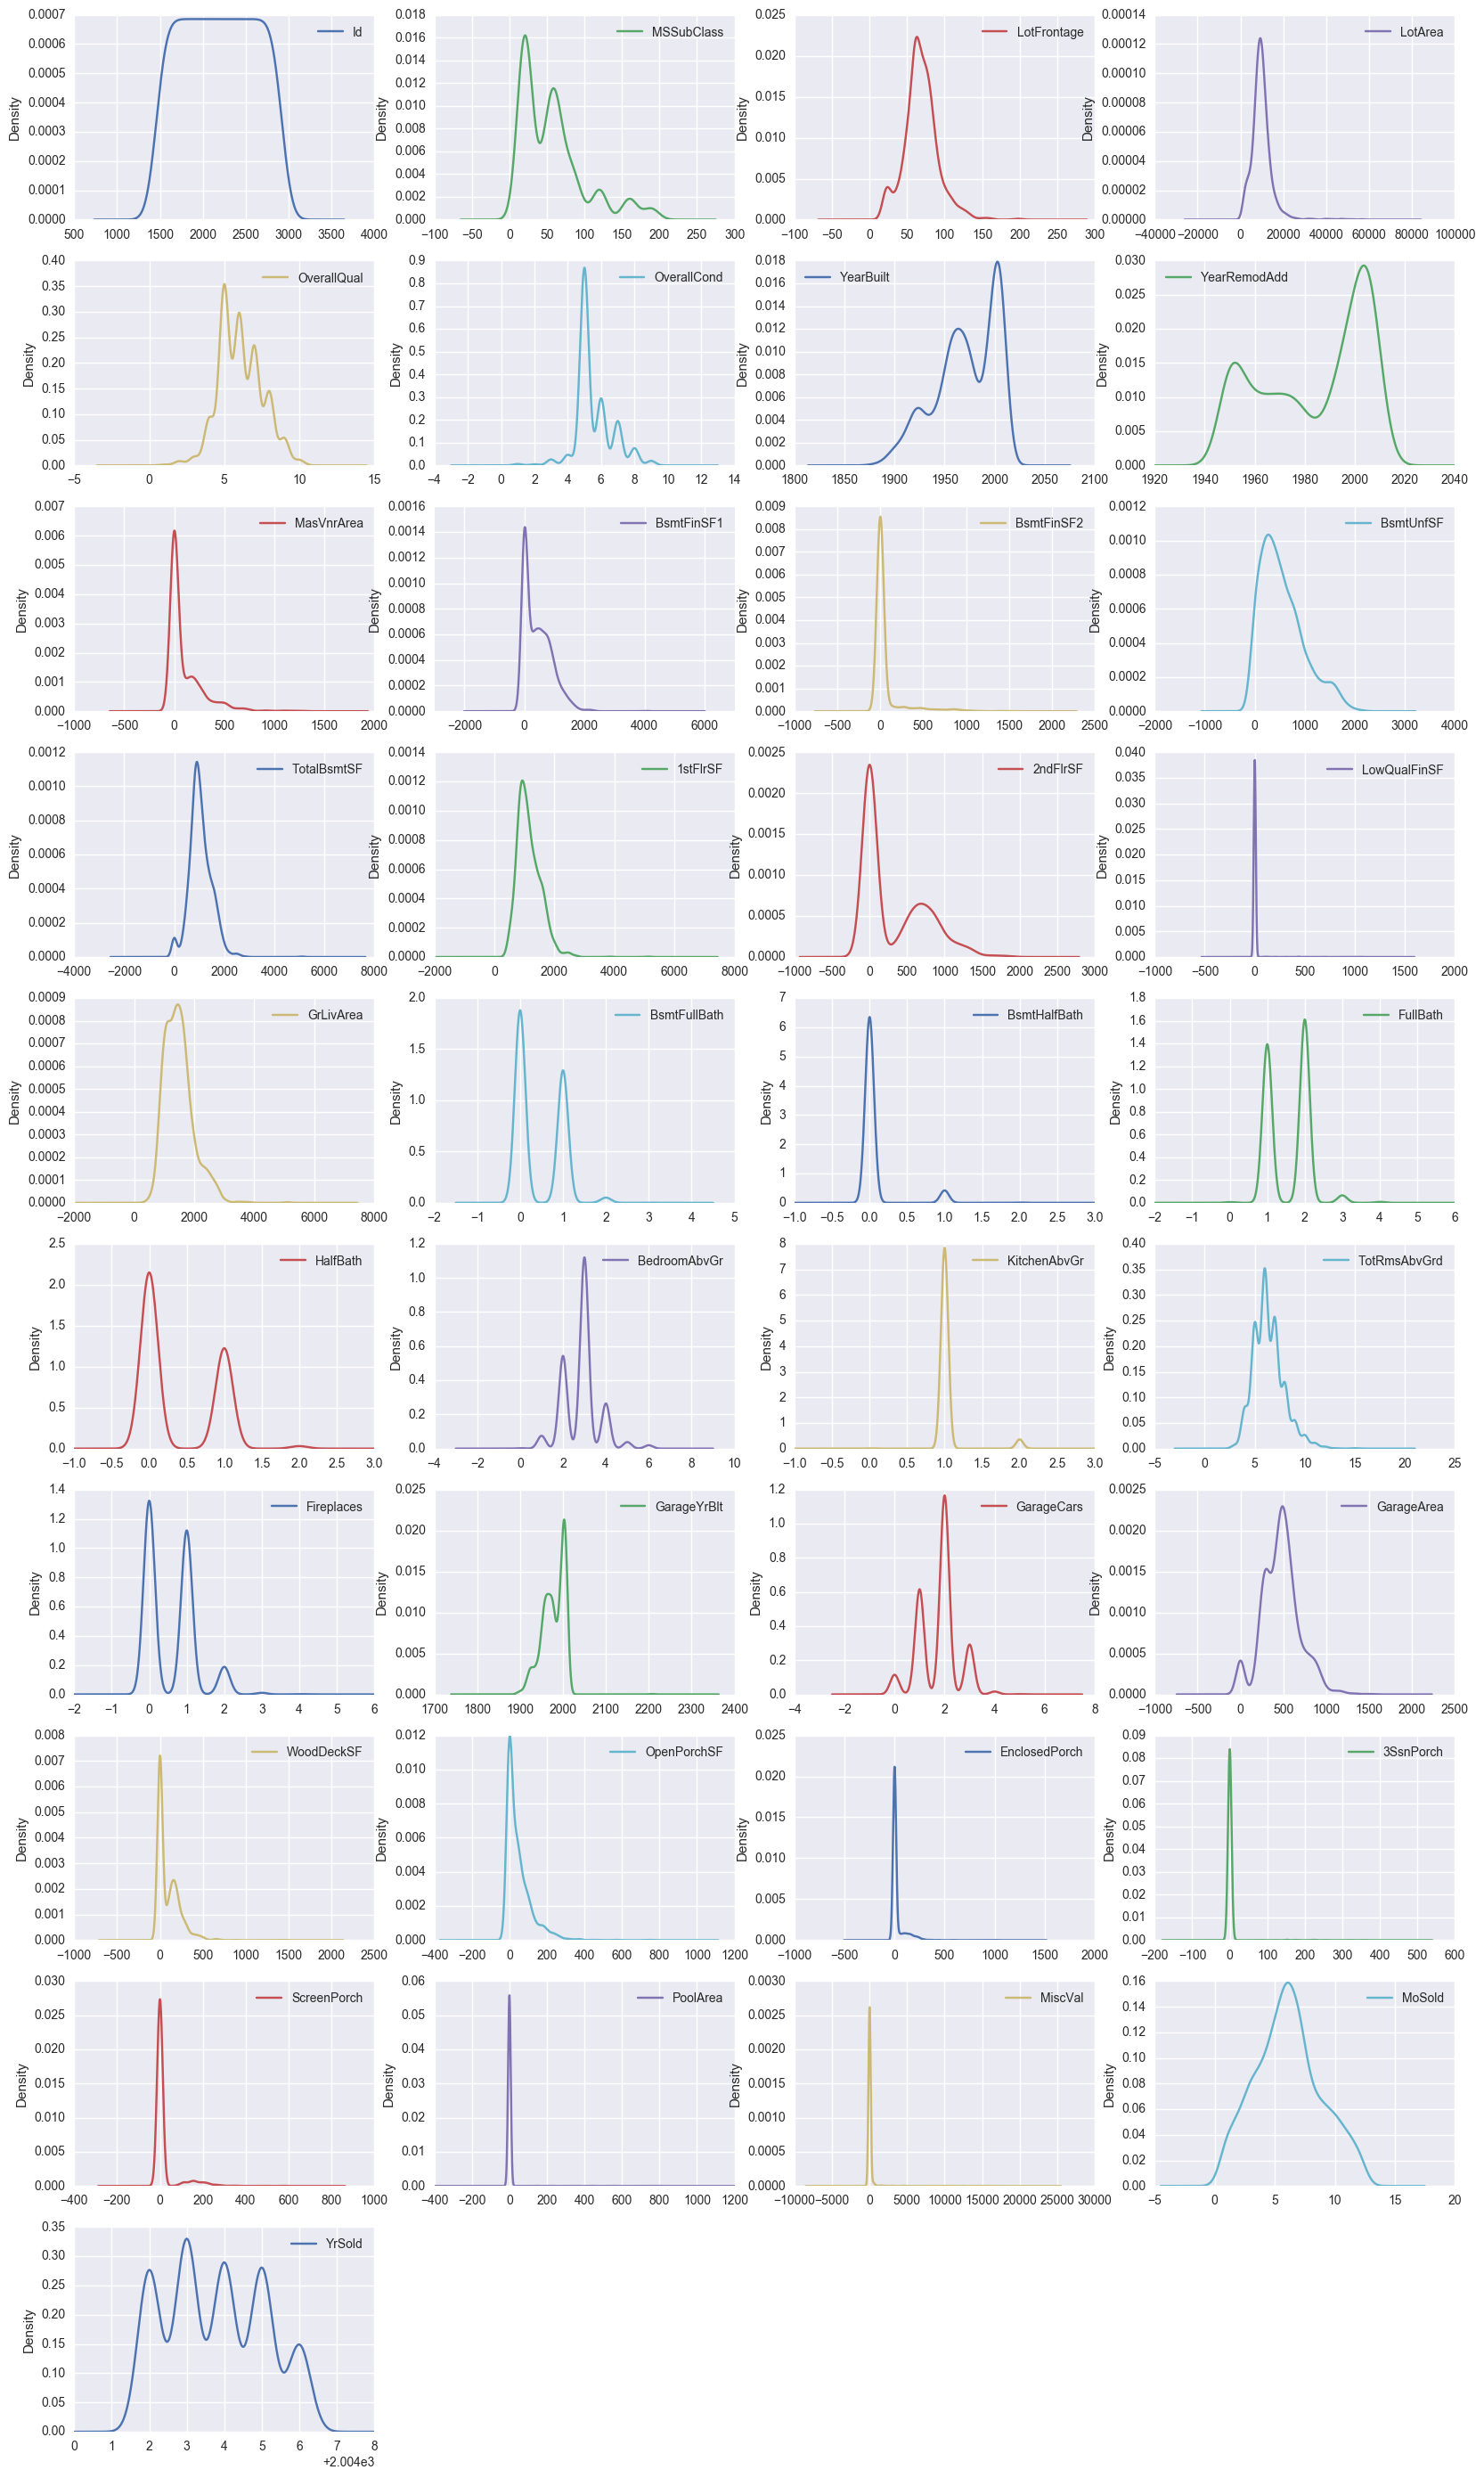

In [34]:
ames_test.plot(kind='density', figsize=(20, 35), layout=(10,4), subplots=True, sharex=False) 
plt.show()

**Box and Whisker Plots** summarize the distribution of each attribute, drawing a line for the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of the data). The whiskers give an idea of the spread of the data and dots outside of the whiskers show candidate outlier values (values that are 1.5 times greater than the size of spread of the middle 50% of the data).

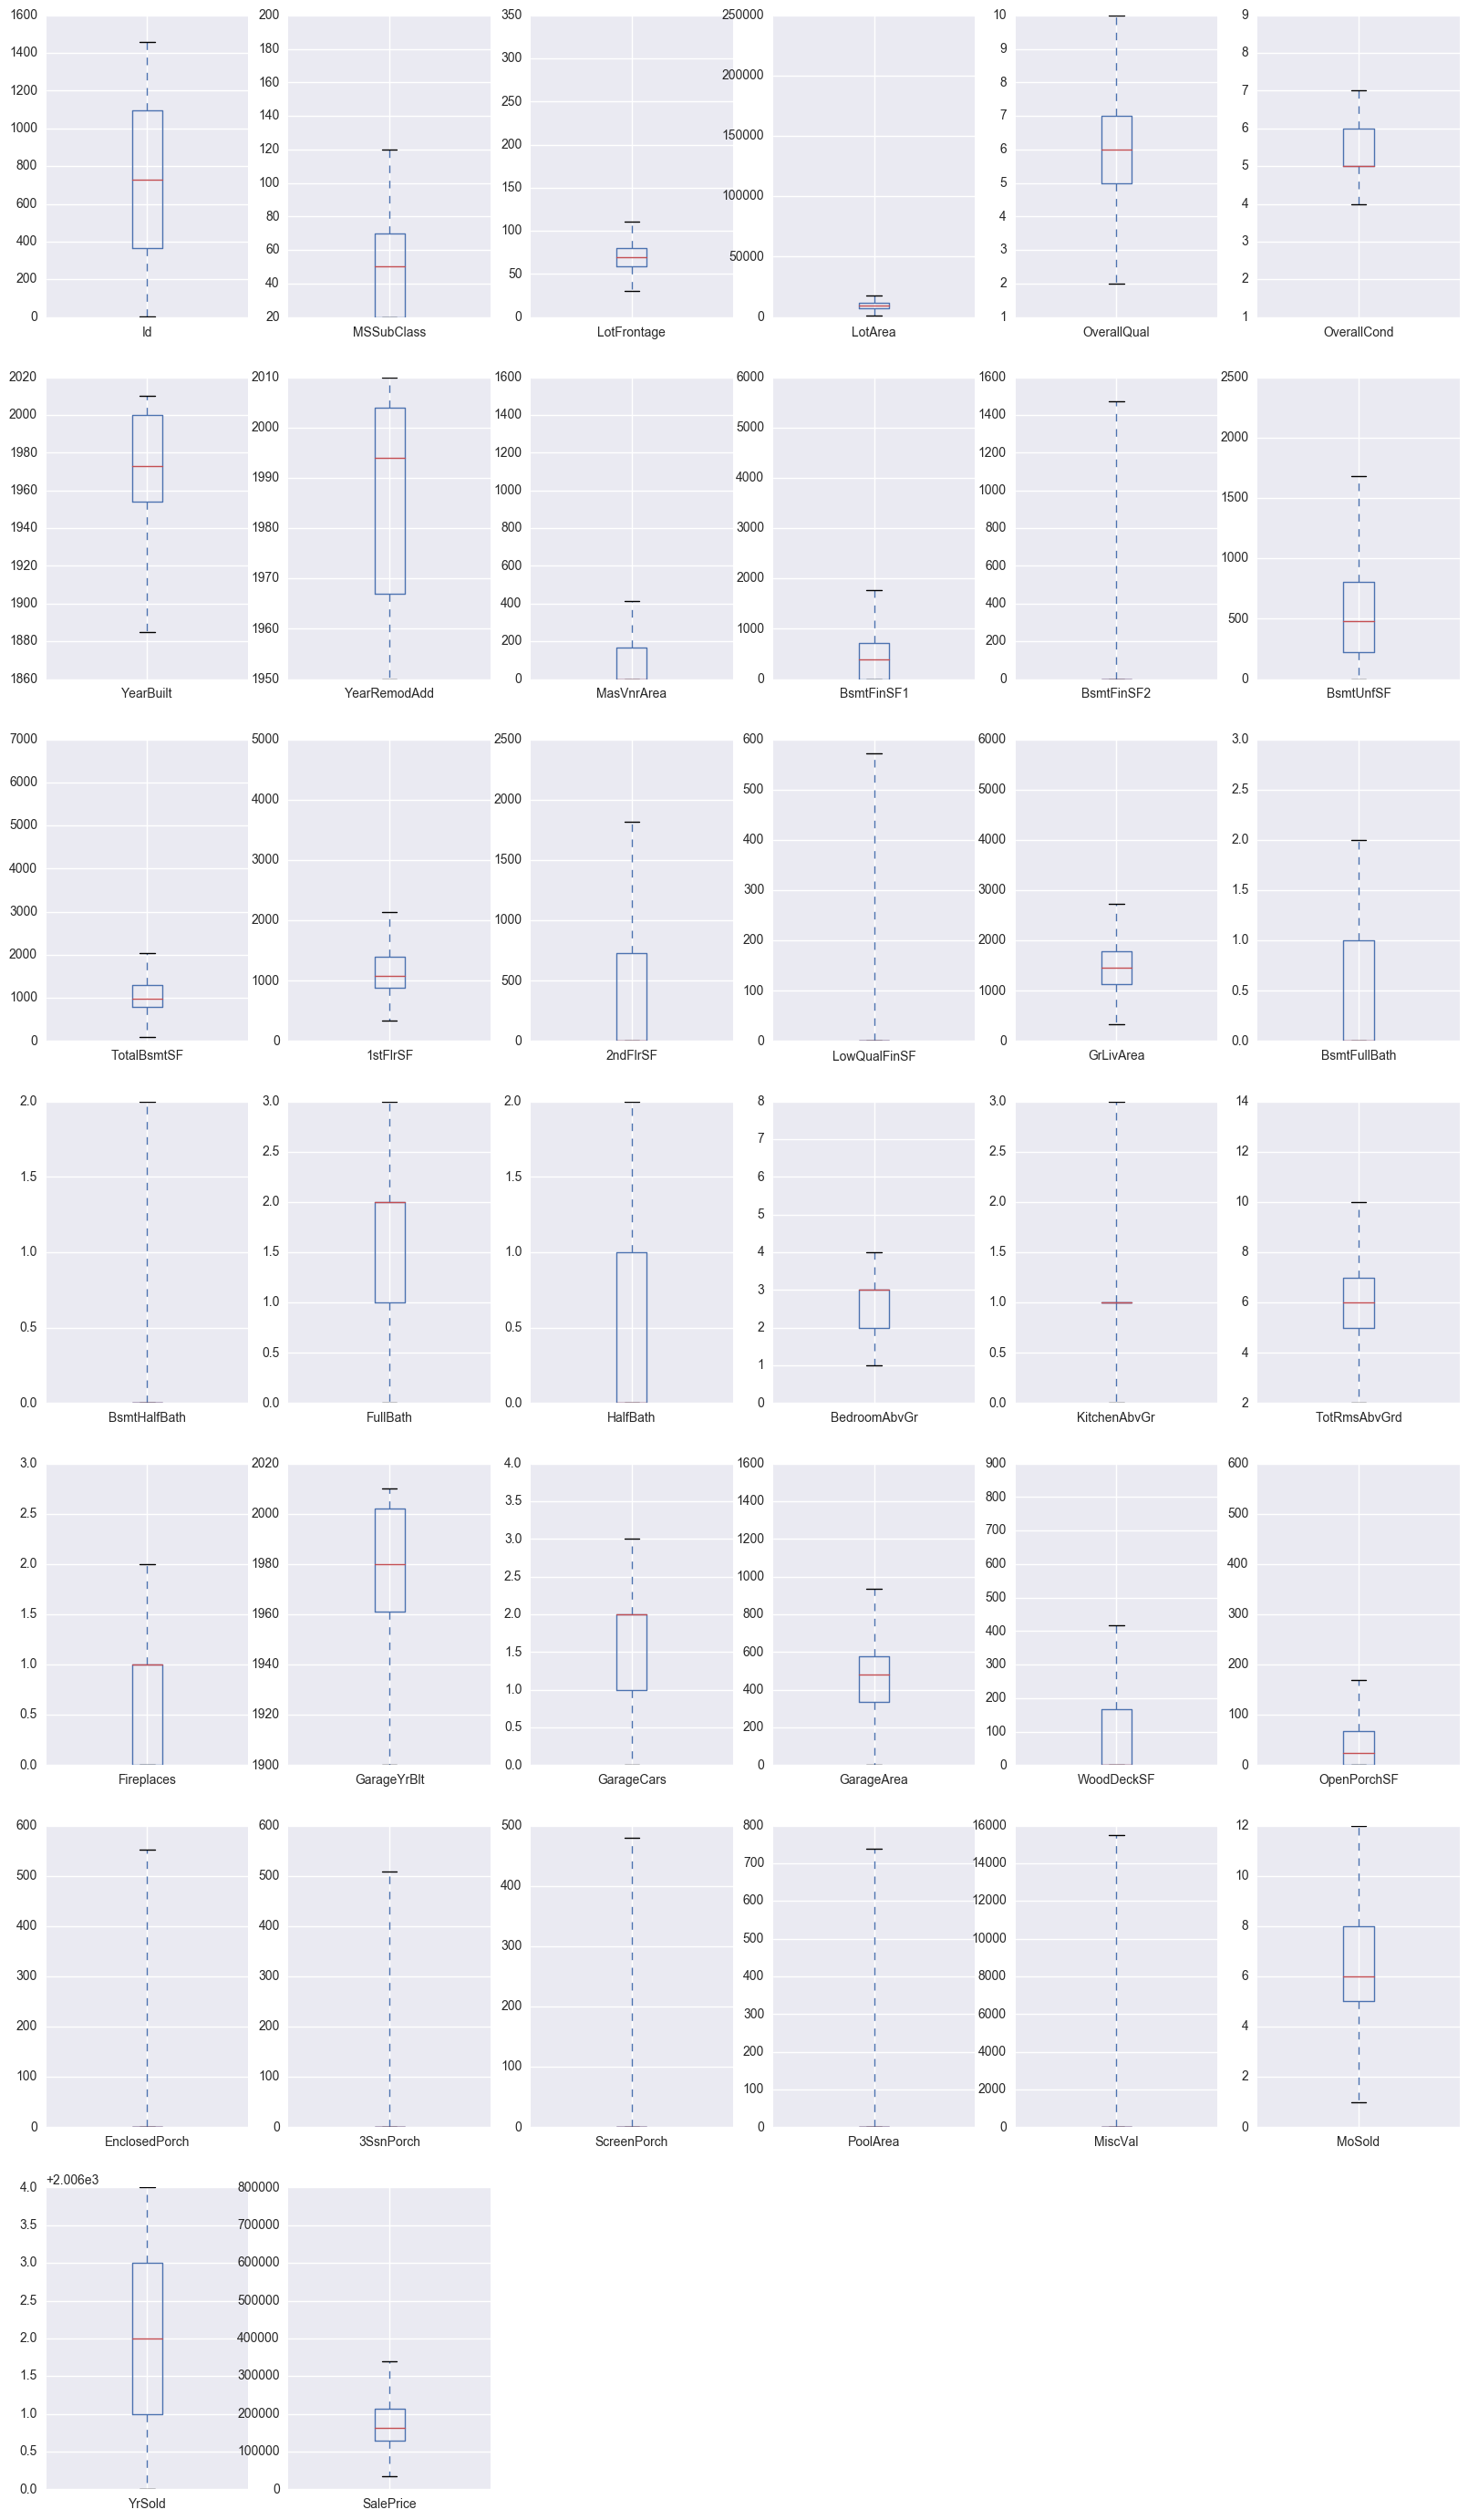

In [35]:
ames_train.plot(kind='box', subplots=True, figsize=(20, 35), layout=(7,6), sharex=False, sharey=False) 
plt.show()

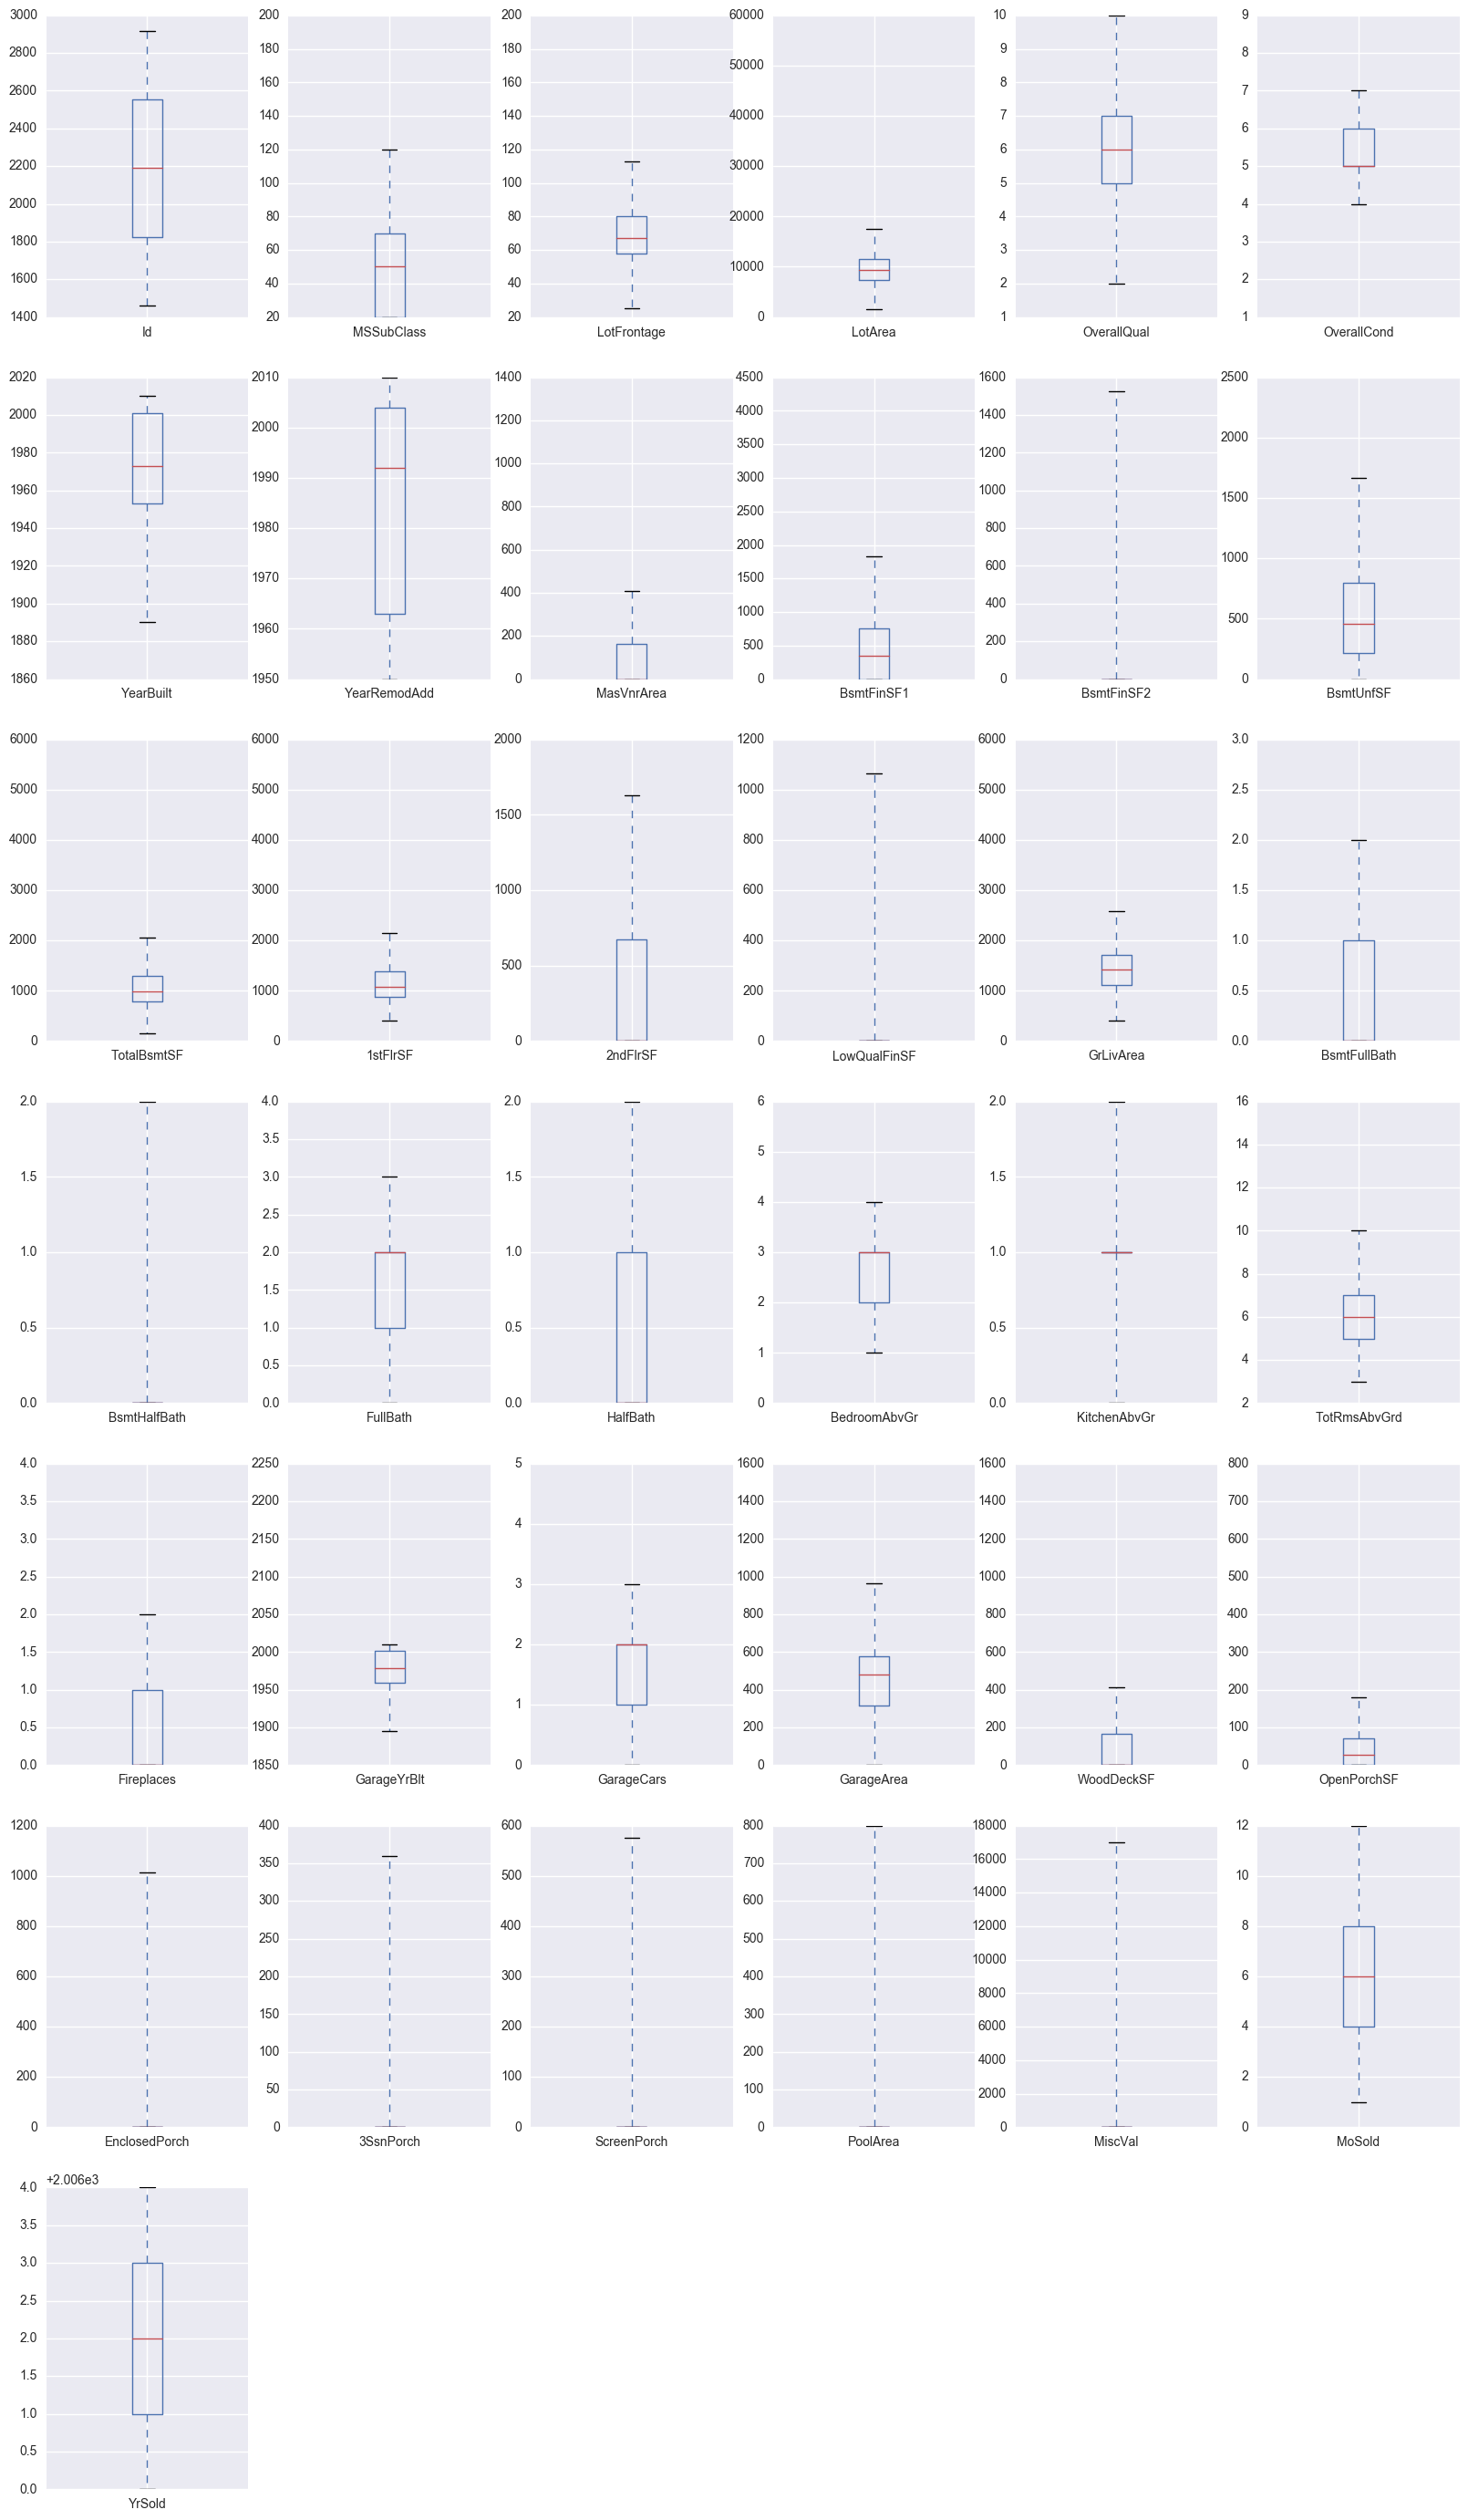

In [36]:
ames_test.plot(kind='box', subplots=True, figsize=(20, 35), layout=(7,6), sharex=False, sharey=False) 
plt.show()

### Target Analysis

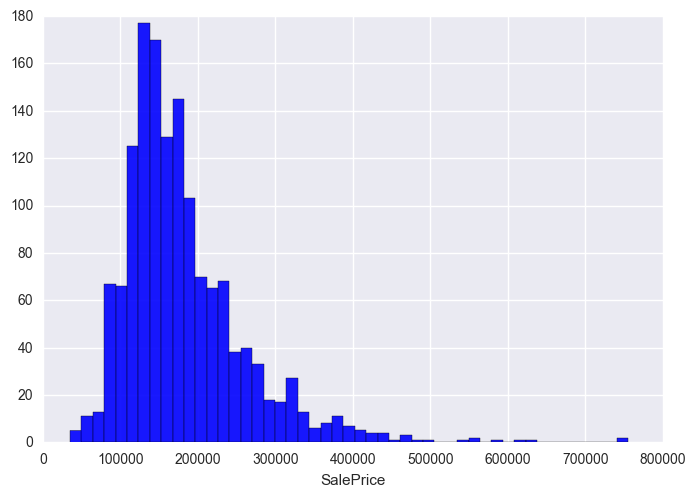

In [37]:
sns.distplot(ames_train['SalePrice'], kde = False, color = 'b', hist_kws={'alpha': 0.9})
plt.show()

In [38]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":ames_train["SalePrice"], "log(price + 1)":np.log1p(ames_train["SalePrice"])})
prices.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d32e710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e396490>]], dtype=object)

In [39]:
#log transform the target:
ames_train["SalePrice"] = np.log1p(ames_train["SalePrice"])

### Multimodal Data Visualizations

In [40]:
categorical_features=['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities',
                      'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
                      'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond',
                      'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
                      'HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu',
                      'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence',
                      'MiscFeature','SaleType','SaleCondition']
non_categorical_features = [col for col in ames_train.columns if col not in categorical_features and col not in ['Id', 'SalePrice']]
y = ames_train['SalePrice']

## Pre-Process Data

Since test data contains values not present in training data, we must create a superset of all values of categorical features then apply one hot encoding.

In [41]:
all_data = pd.concat((ames_train.loc[:,'MSSubClass':'SaleCondition'],
                      ames_test.loc[:,'MSSubClass':'SaleCondition']))

In [42]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

In [43]:
all_data = pd.get_dummies(all_data)
imputer = Imputer()
imputed_all_data = imputer.fit_transform(all_data)

In [44]:
# creating matrices for sklearn:
X_train = imputed_all_data[:ames_train.shape[0]]
X_test = imputed_all_data[ames_test.shape[0]:]
y = ames_train.SalePrice

In [45]:
# check dims of data
print X_train.shape
print X_test.shape
print y.shape

(1459, 288)
(1459, 288)
(1459,)


## Feature Selection

## Validation Dataset

## Evaluate Algorithms

## Evaluate Algorithms with Standardization

## Algorithm Hyper-Parameter Tuning

## Ensemble Methods

## Tune Ensemble Methods

## Finalize Model

     test-rmse-mean  test-rmse-std  train-rmse-mean  train-rmse-std
0            10.380      1.144e-03           10.380       5.291e-04
1             9.345      1.230e-03            9.345       5.338e-04
2             8.413      1.320e-03            8.413       5.441e-04
3             7.575      1.148e-03            7.575       5.276e-04
4             6.820      6.495e-04            6.820       5.005e-04
5             6.142      2.601e-04            6.141       4.666e-04
6             5.530      7.850e-04            5.529       4.452e-04
7             4.979      9.468e-04            4.979       4.135e-04
8             4.484      1.793e-03            4.484       3.983e-04
9             4.038      1.779e-03            4.038       3.713e-04
10            3.637      1.888e-03            3.637       3.482e-04
11            3.276      1.554e-03            3.276       3.472e-04
12            2.952      1.763e-03            2.951       3.233e-04
13            2.659      1.781e-03            2.

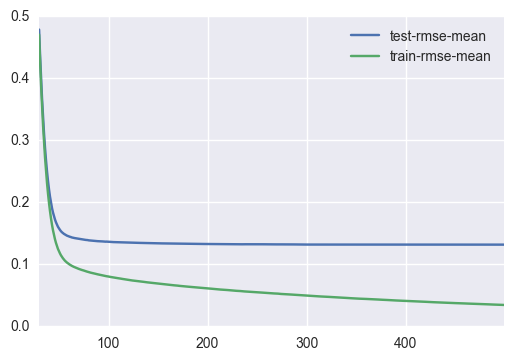

In [65]:
# fit model no training data
%matplotlib inline
dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":3, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)
print model
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [80]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=360, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [85]:
# make predictions for test data
xgb_preds = np.expm1(model_xgb.predict(X_test))
#%time predictions = [round(value) for value in y_pred]
# evaluate predictions
preds = 1.0*xgb_preds
submission = pd.DataFrame({"id":ames_test.Id, "SalePrice":preds})
submission = submission[['id','SalePrice']]
submission.to_csv("xgb_sub_2.csv", index = False)

In [86]:
submission.head()

id   SalePrice
0  1461  121426.102
1  1462  156277.281
2  1463  185785.562
3  1464  191896.875
4  1465  187222.891

In [71]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 10))
    return(rmse)

def rmse_local_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, preds, scoring="neg_mean_squared_error", cv = 10))
    return(rmse)

In [87]:
rmse_cv(model_xgb)

array([ 0.11928155,  0.09654731,  0.10976688,  0.16531412,  0.14548824,
        0.1028281 ,  0.13583662,  0.10153712,  0.11473322,  0.13510765])

In [72]:
rmse_local_cv(model_xgb)

array([ 0.03982715,  0.04447916,  0.04529237,  0.04108314,  0.05189701,
        0.04696661,  0.04027712,  0.0502085 ,  0.03996265,  0.0489942 ])

In [ ]:
print type(ames_test.Id)
print len(ames_test.Id)

print type(xgb_preds)
print len(xgb_preds)

test_ids = np.array(ames_test.Id, dtype=pd.Series)
print len(X_test.loc[0])
